Lab.3.1. Analyze customer reviews to determine whether reviews are positive,negative or neutral

Step-1 : Import necessaries libraries

In [1]:
import pandas as pd

In [2]:
url = "https://raw.githubusercontent.com/ramar92/NLP-Dataset/main/customer_reviews.csv"

In [3]:
df = pd.read_csv(url)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  10 non-null     object
dtypes: object(1)
memory usage: 212.0+ bytes
None


In [4]:
# display top 5 row values
df.head()

,Review
0,I love this product! It's amazing and works pe...
1,This is the worst experience I've ever had.
2,"The product is okay, but I expected something ..."
3,Absolutely fantastic! Would buy again.
4,Not worth the price. Completely disappointed.


In [5]:
import nltk
nltk.download('vader_lexicon')  # Valence Aware Dictionary sEntiment Reasoner

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [7]:
def get_sentiment(score):
  if score>0:
    return 'positive'
  elif score<0:
    return 'negative'
  else:
    return 'neutral'

In [9]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia=SentimentIntensityAnalyzer()

In [14]:
list1=[lambda x:sia.polarity_scores(x)]
print(list1[0]("The product is good"))

{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}


In [15]:
df['compound']=df['Review'].apply(lambda x:sia.polarity_scores(str(x))['compound'])
df['compound']

,compound
0,0.9259
1,-0.6249
2,0.6486
3,0.6352
4,-0.6198
5,-0.5486
6,0.8356
7,-0.7096
8,-0.3950
9,0.9200


In [16]:
df['sentiment']=df['compound'].apply(get_sentiment)
df['sentiment']

,sentiment
0,positive
1,negative
2,positive
3,positive
4,negative
5,negative
6,positive
7,negative
8,negative
9,positive


In [17]:
df.head()

,Review,compound,sentiment
0,I love this product! It's amazing and works pe...,0.9259,positive
1,This is the worst experience I've ever had.,-0.6249,negative
2,"The product is okay, but I expected something ...",0.6486,positive
3,Absolutely fantastic! Would buy again.,0.6352,positive
4,Not worth the price. Completely disappointed.,-0.6198,negative


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

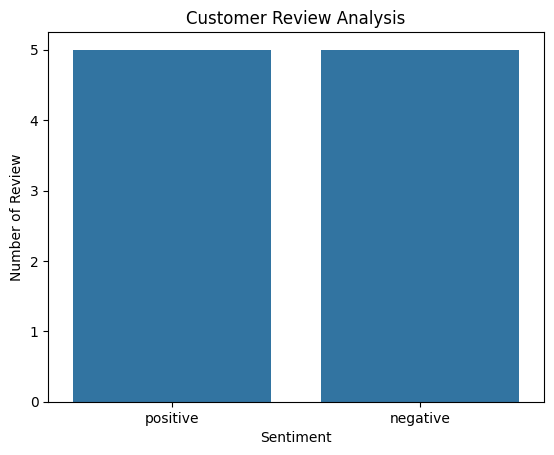

In [20]:
sns.countplot(x='sentiment',data=df)
plt.title('Customer Review Analysis')
plt.xlabel("Sentiment")
plt.ylabel("Number of Review")
plt.show()